In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/Users/nguyen_truong/opt/anaconda3/envs/nmtruong/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df_train = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
df_test = pd.read_csv('bank-additional/bank-additional.csv', delimiter=';')

In [6]:
df_train.shape

(41188, 21)

In [7]:
df_test.shape

(4119, 21)

In [8]:
df_test.shape[0] / (df_test.shape[0] + df_train.shape[0]) * 100 

9.091310393537423

Input variables:
### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

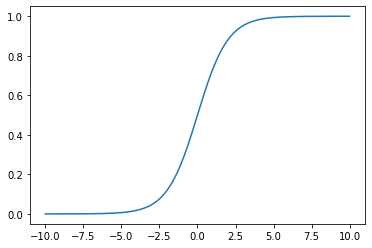

In [11]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [12]:
pd.options.display.max_columns = 25

In [13]:
df_train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df_train.duplicated().sum()

12

In [16]:
df_train.drop_duplicates(inplace=True)

In [17]:
df_train.duplicated().sum()

0

In [19]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
macro_df = df_train.iloc[:, -5:-1]
macro_df.head(2)

,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,93.994,-36.4,4.857,5191.0
1,93.994,-36.4,4.857,5191.0


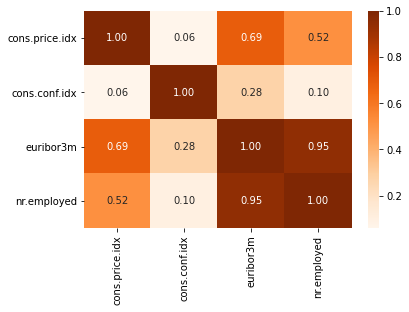

In [21]:
sns.heatmap(macro_df.corr(), annot=True, fmt='.2f', cmap='Oranges');

In [29]:
df_train.iloc[:, :-6].describe()

,age,duration,campaign,pdays,previous
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013
std,10.42068,259.305321,2.770318,186.937102,0.494964
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [57]:
df_train.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


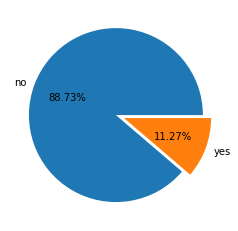

In [37]:
plt.pie(x=df_train.y.value_counts().values, explode=[0, 0.1], 
        labels=['no', 'yes'], autopct='%0.2f%%');

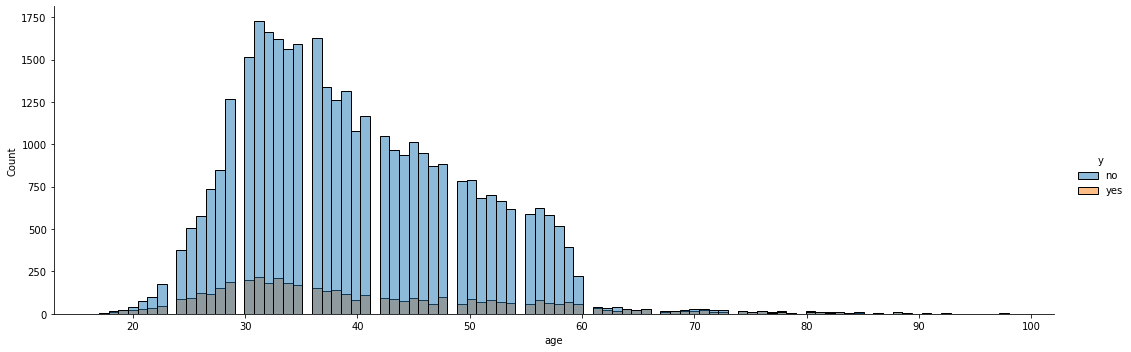

In [41]:
sns.displot(data=df_train, x='age', hue='y', aspect=3);

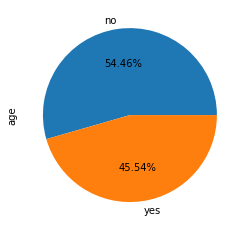

In [91]:
df_train.query("age > 60").groupby('y').count()['age'].plot(kind='pie', autopct='%0.2f%%');

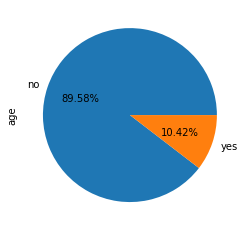

In [92]:
df_train.query("age < 60").groupby('y').count()['age'].plot(kind='pie', autopct='%0.2f%%');

In [59]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']

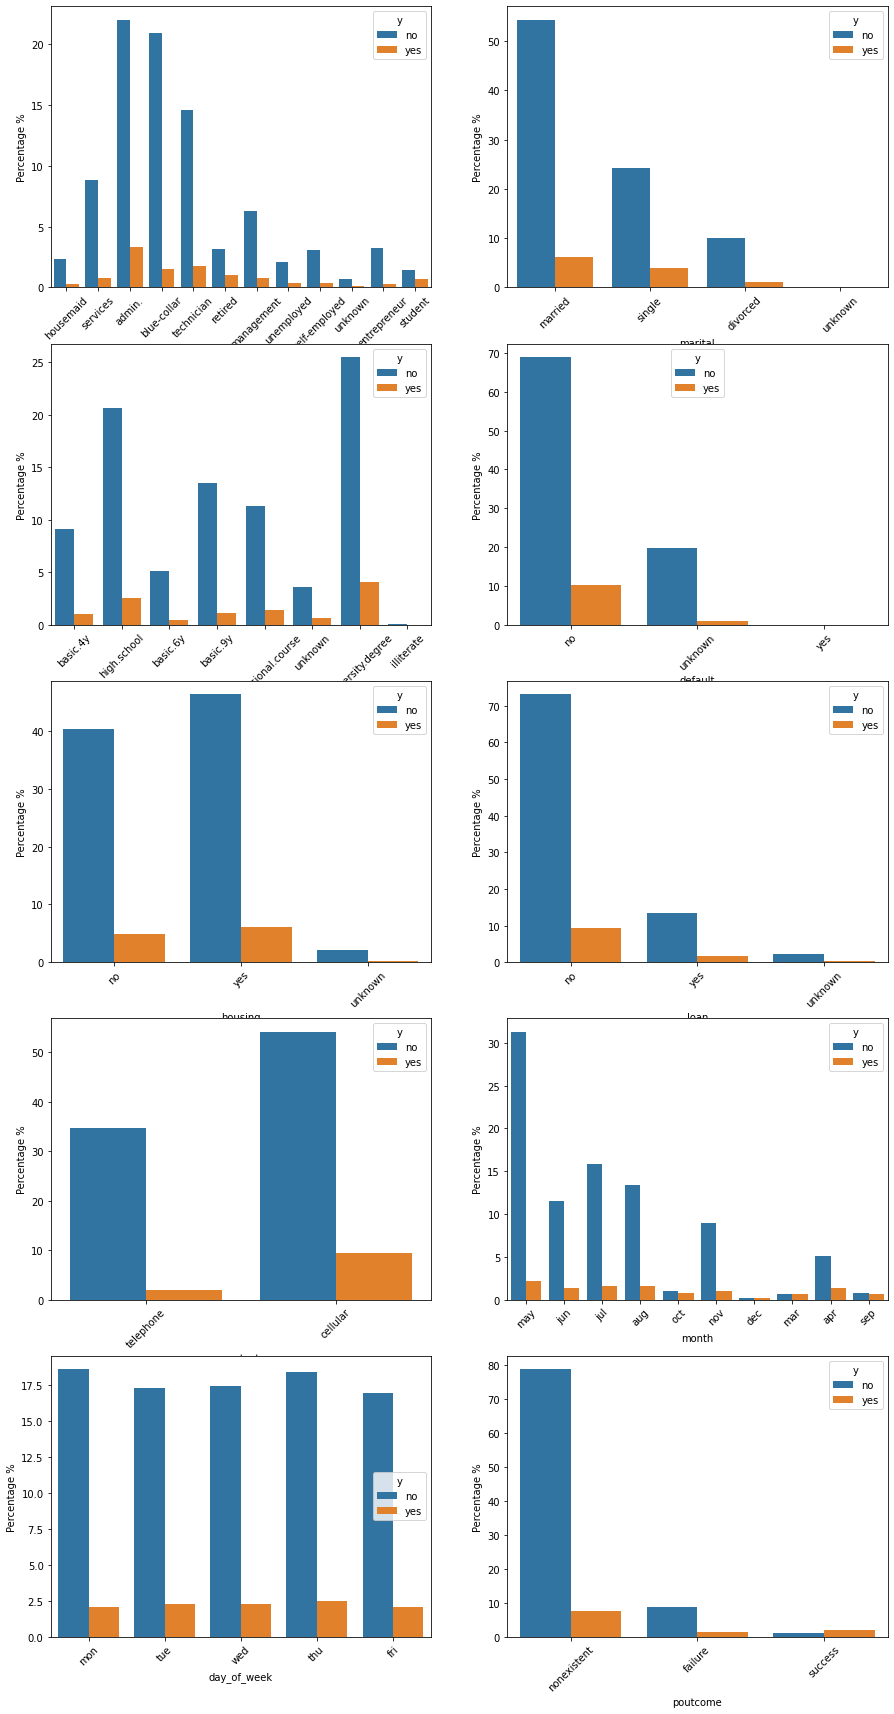

In [72]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
index = 0
for i in range(5):
    for j in range(2):
        sns.barplot(x=columns[index], y='age', hue='y', data=df_train, 
                    estimator= lambda x : len(x)/len(df_train)*100, ax=axes[i, j])
        index += 1
        axes[i, j].set(ylabel='Percentage %')
#         axes[i, j].set_xticklabels(rotation=40, ha=ha[n])
        axes[i, j].tick_params(axis='x', rotation=45)
plt.show()

In [73]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
train_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y']

In [83]:
df_train[['campaign', 'pdays','previous']].describe()

,campaign,pdays,previous
count,41176.000000,41176.000000,41176.000000
mean,2.567879,962.464810,0.173013
std,2.770318,186.937102,0.494964
min,1.000000,0.000000,0.000000
25%,1.000000,999.000000,0.000000
50%,2.000000,999.000000,0.000000
75%,3.000000,999.000000,0.000000
max,56.000000,999.000000,7.000000


In [82]:
df_train.query('previous >= 1')[['previous', 'y']].groupby('y').agg(['min', 'mean', 'median', 'max', 'std', 'count'])

previous                                     
         min      mean median max       std count
y                                                
no         1  1.172564      1   7  0.513369  4126
yes        1  1.525017      1   6  0.846658  1499

In [84]:
df_train.query('campaign >= 1')[['campaign', 'y']].groupby('y').agg(['min', 'mean', 'median', 'max', 'std', 'count'])

campaign                                      
         min      mean median max       std  count
y                                                 
no         1  2.633385      2  56  2.873768  36537
yes        1  2.051951      2  23  1.666353   4639

## Pipeline

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
def preprocessing(path):
    df_train = pd.read_csv(path, delimiter=';')
    train_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
              'contact', 'month', 'campaign', 'poutcome', 'emp.var.rate', 
              'cons.price.idx','cons.conf.idx', 'euribor3m', 'y']
    df = df_train[train_cols]
    df['age'] = np.where(df.age >= 60, 1, 0)
    df['y'] = np.where(df.y =='no', 0, 1)

    df_one_hot = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
    df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)
    df_final = pd.concat([df_one_hot, df], axis=1)
    return df_final

In [148]:
def get_result(X_train, y_train, X_test, y_test, threshold=0.12):
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    
    predicted_proba = logistic.predict_proba(X_test)
    predicted_results = np.where(predicted_proba[:, 1] > threshold, 1, 0)
    
    print(classification_report(y_test, predicted_results))
    return predicted_proba, predicted_results

In [149]:
df_train = preprocessing('bank-additional/bank-additional-full.csv')
df_test = preprocessing('bank-additional/bank-additional.csv')

X_train, y_train = df_train.iloc[:, :1], df_train.iloc[:, -1]
X_test, y_test = df_test.iloc[:, :1], df_test.iloc[:, -1]

predicted_proba, predicted_results = get_result(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3668
           1       0.13      0.29      0.18       451

    accuracy                           0.71      4119
   macro avg       0.51      0.53      0.50      4119
weighted avg       0.81      0.71      0.75      4119

